In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
df = pd.read_csv('/content/heart_disease_data.csv')

# Print the first few rows of the dataset
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

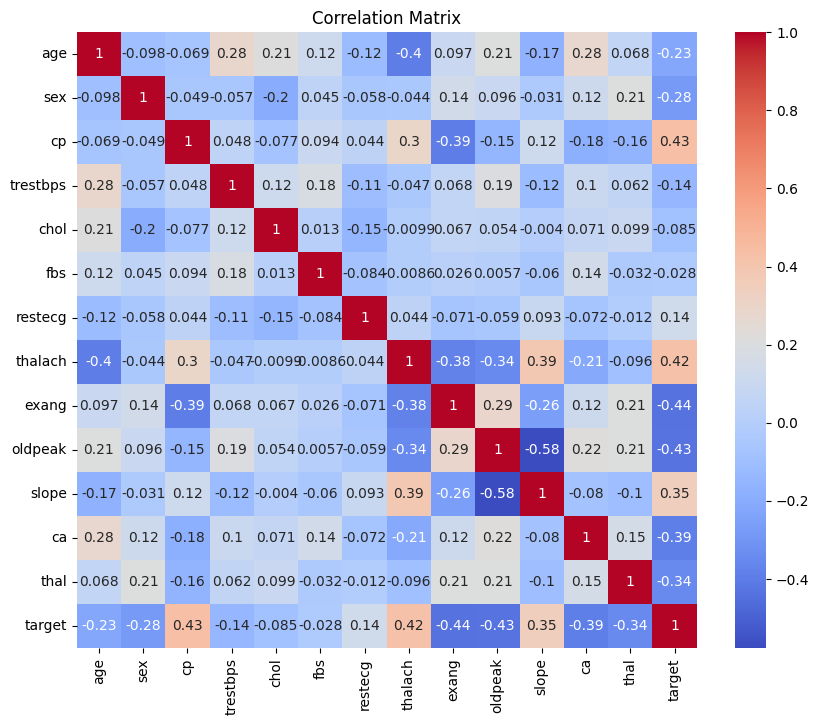

In [3]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [4]:
# Print the important relationships (correlation > 0.5 or < -0.5)
print(corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)])

          age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
age       1.0  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
sex       NaN  1.0  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
cp        NaN  NaN  1.0       NaN   NaN  NaN      NaN      NaN    NaN   
trestbps  NaN  NaN  NaN       1.0   NaN  NaN      NaN      NaN    NaN   
chol      NaN  NaN  NaN       NaN   1.0  NaN      NaN      NaN    NaN   
fbs       NaN  NaN  NaN       NaN   NaN  1.0      NaN      NaN    NaN   
restecg   NaN  NaN  NaN       NaN   NaN  NaN      1.0      NaN    NaN   
thalach   NaN  NaN  NaN       NaN   NaN  NaN      NaN      1.0    NaN   
exang     NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    1.0   
oldpeak   NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
slope     NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
ca        NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
thal      NaN  NaN  NaN       NaN   NaN  NaN      N

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

[[24  5]
 [ 5 27]]
ROC AUC score: 0.9203


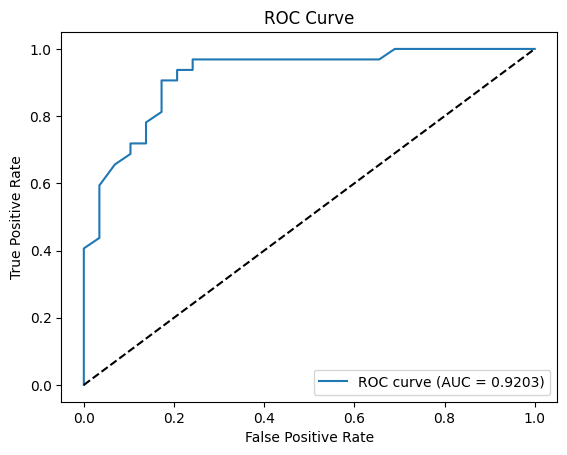

In [5]:
# Split the dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f'ROC AUC score: {roc_auc:.4f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [7]:
# Create a numpy array to test the prediction
test_array = np.array([[50, 1, 0, 144, 200, 0, 0, 126, 1, 0.9, 1, 0, 3]])

# Make predictions on the test array
prediction = rf.predict(test_array)

# Print the prediction
print(f'Prediction: {prediction[0]}')

Prediction: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0]


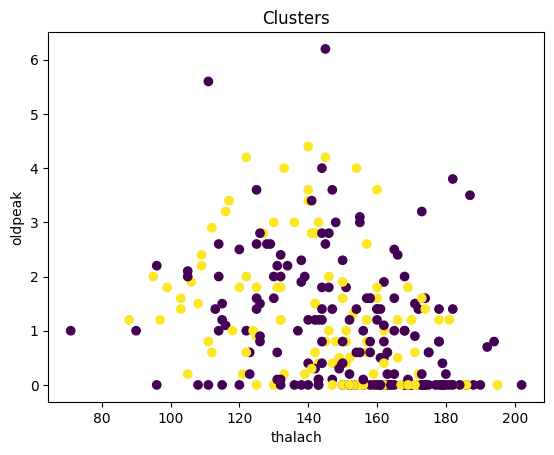

In [8]:
# Create a KMeans clustering model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Print the cluster labels
print(kmeans.labels_)

# Visualize the clusters
plt.scatter(X['thalach'], X['oldpeak'], c=kmeans.labels_)
plt.xlabel('thalach')
plt.ylabel('oldpeak')
plt.title('Clusters')
plt.show()

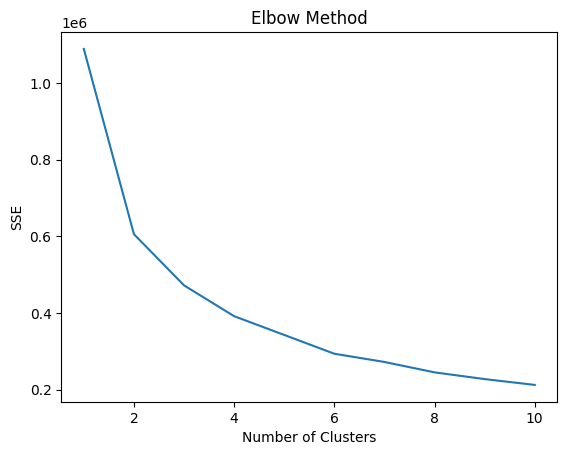

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate SSE for different number of clusters
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot SSE against number of clusters
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

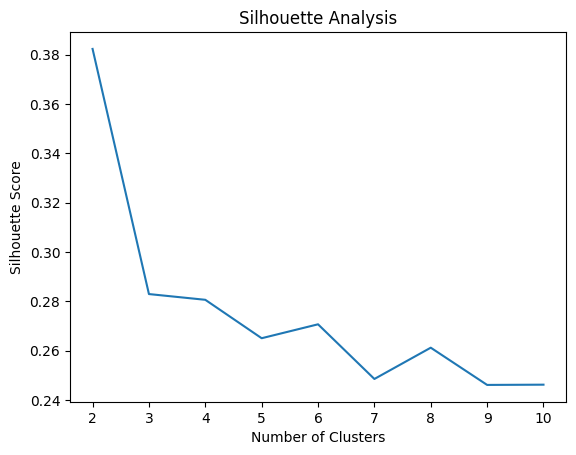

Optimal number of clusters: 2


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate silhouette score for different number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette score against number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Print the optimal number of clusters (highest silhouette score)
optimal_n_clusters = np.argmax(silhouette_scores) + 2
print(f'Optimal number of clusters: {optimal_n_clusters}')

In [11]:
# Create a numpy array to test the prediction
test_array = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

# Make predictions on the test array
prediction = rf.predict(test_array)

# Print the prediction in scientific term
if prediction[0] == 1:
    print('Prediction: You may be at risk of developing Coronary Artery Disease (CAD).')
else:
    print('Prediction: You are unlikely to have Coronary Artery Disease (CAD).')

Prediction: You may be at risk of developing Coronary Artery Disease (CAD).


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


age: 0.011475409836065587
sex: 0.019672131147541017
cp: 0.055737704918032836
trestbps: -0.022950819672131074
chol: -0.014754098360655688
fbs: -0.0016393442622950616
restecg: -0.021311475409836002
thalach: -0.003278688524590123
exang: -0.013114754098360614
oldpeak: -0.01147540983606552
slope: -0.0016393442622950505
ca: 0.022950819672131195
thal: 0.04590163934426235


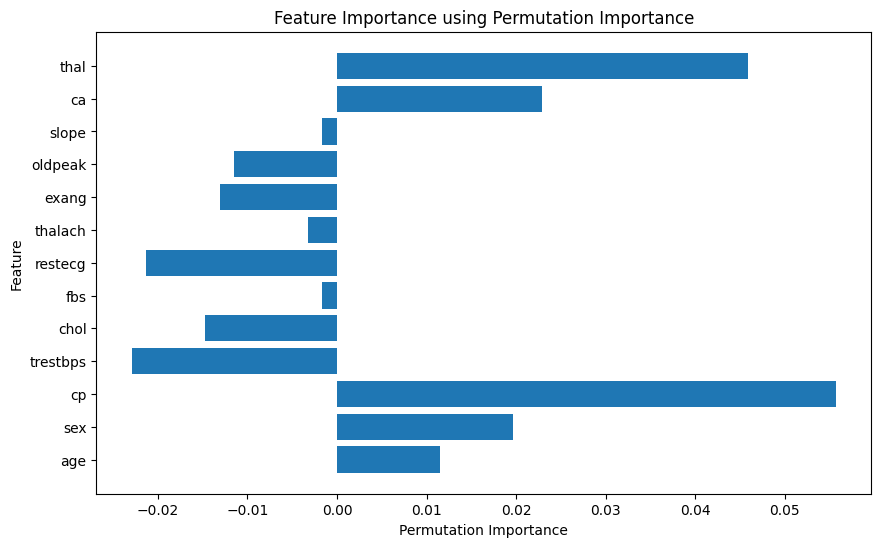

In [19]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
results = permutation_importance(rf, X_test, y_test, n_repeats=10)

# Print the feature importance
for i, feature in enumerate(X_test.columns):
    print(f'{feature}: {results.importances_mean[i]}')

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns, results.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Permutation Importance')
plt.show()

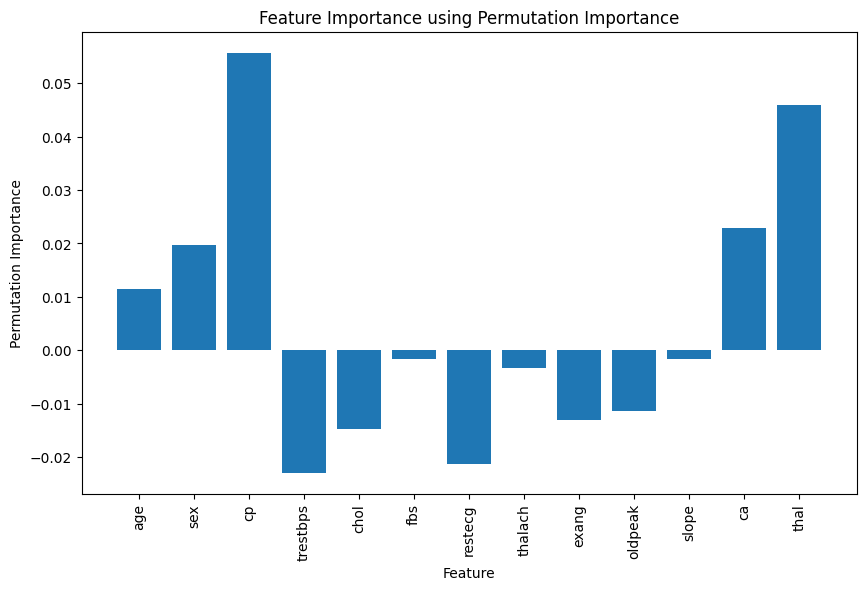

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(X_test.columns, results.importances_mean)
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Feature Importance using Permutation Importance')
plt.xticks(rotation=90)
plt.show()

[0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0
 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0
 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 1 0]


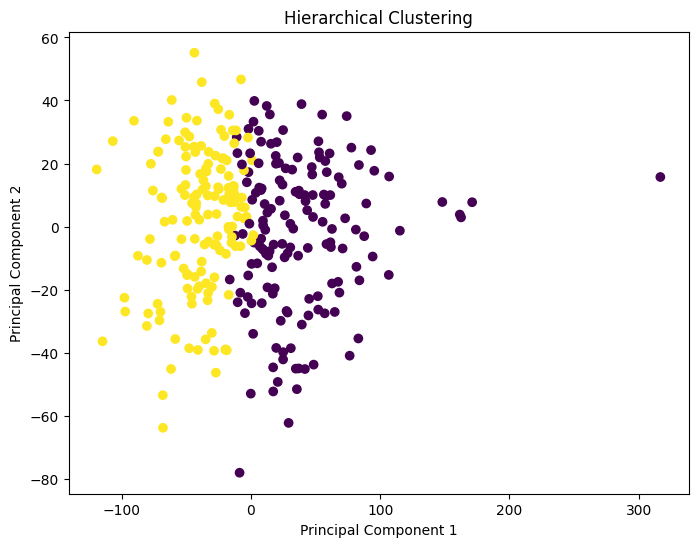

In [21]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a hierarchical clustering model
hclust = AgglomerativeClustering(n_clusters=2)

# Fit the model to the data
hclust.fit(X)

# Print the cluster labels
print(hclust.labels_)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hclust.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering')
plt.show()

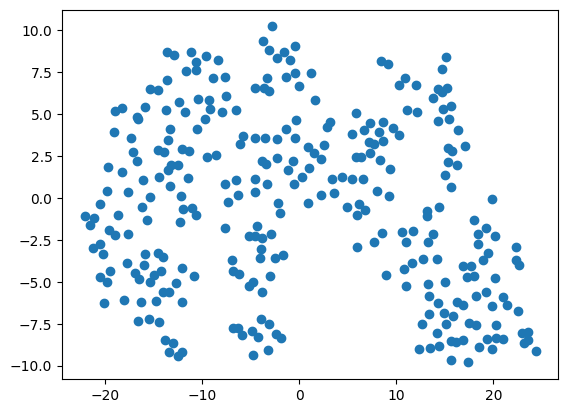

In [15]:
from sklearn.manifold import TSNE

# Create a t-SNE model
tsne = TSNE(n_components=2)

# Fit the model to the data
tsne_data = tsne.fit_transform(X)

# Plot the t-SNE data
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

[0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0
 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0
 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 1 0]


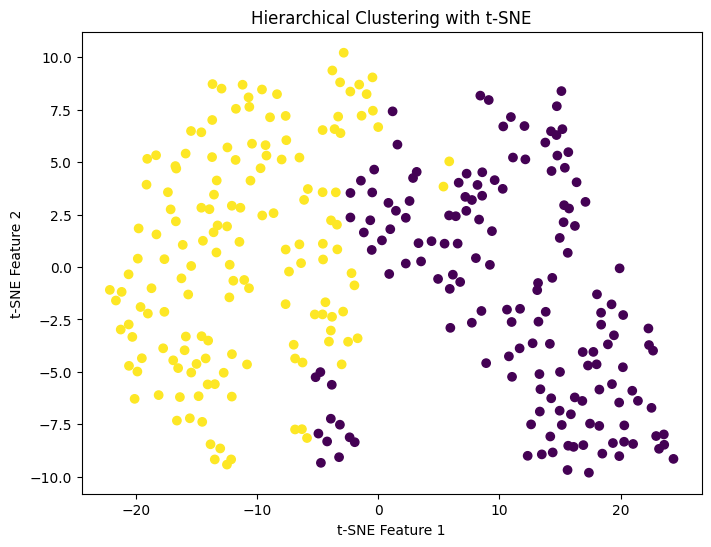

In [22]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Create a hierarchical clustering model
hclust = AgglomerativeClustering(n_clusters=2)

# Fit the model to the data
hclust.fit(X)

# Print the cluster labels
print(hclust.labels_)

# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hclust.labels_, cmap='viridis')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('Hierarchical Clustering with t-SNE')
plt.show()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=bb80ad12aa43fbea29f61d8c6962a425df032455eede4616125fef2b3163c8f0
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


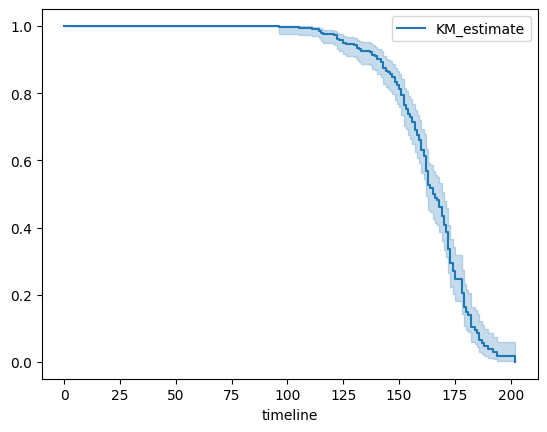

In [18]:
!pip install lifelines
import lifelines
from lifelines import KaplanMeierFitter

# Create a Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the estimator to the data
kmf.fit(X['thalach'], event_observed=y)

# Plot the survival curve
kmf.plot_survival_function()
plt.show()

In [28]:
import shap

# ... (Your existing code to calculate SHAP values) ...
# Create a SHAP explainer
explainer = shap.TreeExplainer(rf)

# Calculate the SHAP values for a specific prediction
shap_values = explainer.shap_values(X_test.iloc[0])

# Initialize Javascript visualization
shap.initjs()

# Plot the SHAP values
shap.plots.force(explainer.expected_value[1], shap_values[1])

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Create an RFE model
rfe = RFE(logreg, n_features_to_select=10)

# Fit the RFE model to the data
rfe.fit(X, y)

# Print the selected features with their names
print("Selected Features:")
for i, feature in enumerate(X.columns):
    if rfe.support_[i]:
        print(feature)

Selected Features:
sex
cp
trestbps
restecg
thalach
exang
oldpeak
slope
ca
thal


[ 1 -1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1 -1  1  1
 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1  1  1
  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1  1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1 -1
 -1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1
 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1
  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1 -1  1
  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1
  1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1
  1 -1  1 -1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1  1
 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1  1
 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1]


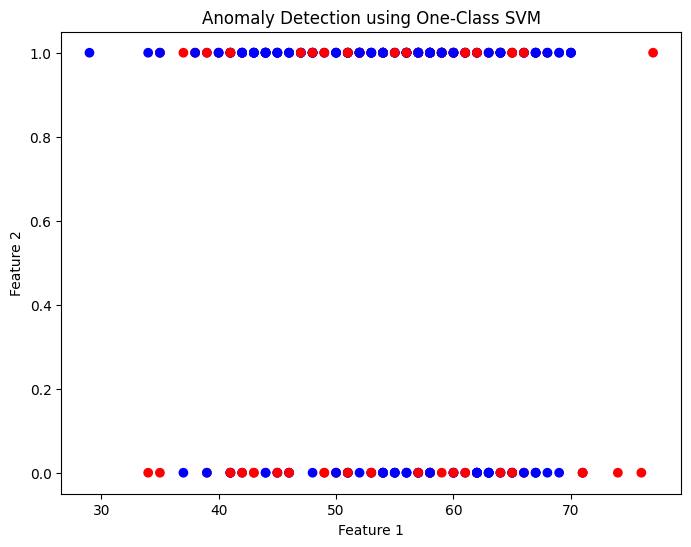

In [34]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import numpy as np

# Create a one-class SVM model
ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)

# Fit the model to the data
ocsvm.fit(X)

# Print the anomaly labels
anomaly_labels = ocsvm.predict(X)
print(anomaly_labels)

# Create a scatter plot to visualize the anomalies
plt.figure(figsize=(8, 6))
# Access the columns using their names or .iloc for integer-location based indexing
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=['red' if label == -1 else 'blue' for label in anomaly_labels])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection using One-Class SVM')
plt.show()

In [42]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for class 1 (assuming binary classification)
shap_values = explainer.shap_values(X)

# Access SHAP values for class 1 correctly and for all instances
shap_values_class1 = shap_values[1]

# Plot the SHAP dependence for class 1, using the correct shap_values for the class
shap.dependence_plot('Feature 1', shap_values_class1, X, interaction_index=None)
plt.show()

ValueError: Could not find feature named: Feature 1

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


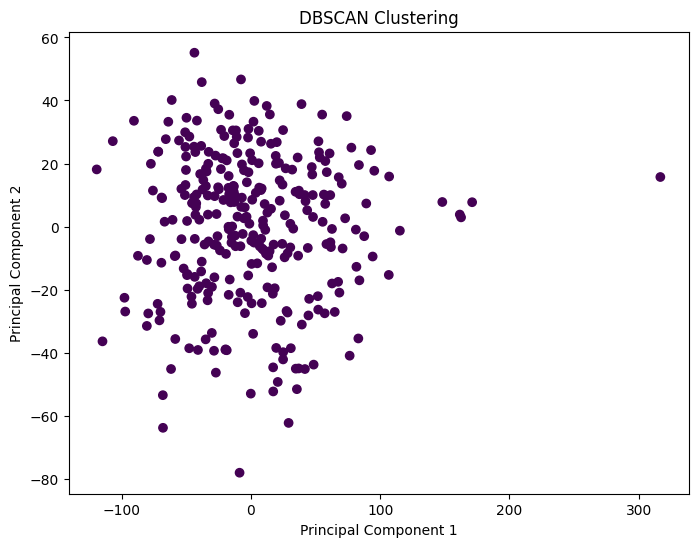

In [44]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the model to the data
dbscan.fit(X)

# Print the cluster labels
cluster_labels = dbscan.labels_
print(cluster_labels)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()